# Importing Lib

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import plotly.express as px
import math
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

%matplotlib inline

# Data Cleaning

In [49]:
Scraped_data = pd.read_excel('/Users/macbook/Desktop/etsyfinal4.xlsx')
Scraped_data.head()

,Sales,Announcement,Admirer,Badge,Category,Shipping,Review,Reply,Year,Seller,Announce,Location,Rating,Total Items,Image
0,35865.0,"If you're planning a wedding, we invite you to...",46618.0,0,20,0,1,1,2008.0,jewelrybyjohan,1,"Oakdale, Minnesota",5.0,829,1
1,369750.0,Thank you all for a great 2022! We can't wait ...,40476.0,0,21,0,1,1,2008.0,zoeysattic,1,"St Louis, Missouri",5.0,5038,1
2,369755.0,Thank you all for a great 2022! We can't wait ...,40476.0,0,21,0,1,1,2008.0,zoeysattic,1,"St Louis, Missouri",5.0,5038,1
3,369757.0,Thank you all for a great 2022! We can't wait ...,40476.0,0,21,0,1,1,2008.0,zoeysattic,1,"St Louis, Missouri",5.0,5038,1
4,7283.0,Check out my new listings! More to come daily!...,2981.0,1,17,1,1,1,2007.0,1000WordPhotoShop,1,"Olympia, Washington",5.0,104,1


In [50]:
Scraped_data['Sales'].describe()

count      5995.000000
mean      11110.857548
std       32165.482278
min           2.000000
25%         910.000000
50%        3175.000000
75%        9465.000000
max      950812.000000
Name: Sales, dtype: float64

In [51]:
Scraped_data

,Sales,Announcement,Admirer,Badge,Category,Shipping,Review,Reply,Year,Seller,Announce,Location,Rating,Total Items,Image
0,35865.0,"If you're planning a wedding, we invite you to...",46618.0,0,20,0,1,1,2008.0,jewelrybyjohan,1,"Oakdale, Minnesota",5.0,829,1
1,369750.0,Thank you all for a great 2022! We can't wait ...,40476.0,0,21,0,1,1,2008.0,zoeysattic,1,"St Louis, Missouri",5.0,5038,1
2,369755.0,Thank you all for a great 2022! We can't wait ...,40476.0,0,21,0,1,1,2008.0,zoeysattic,1,"St Louis, Missouri",5.0,5038,1
3,369757.0,Thank you all for a great 2022! We can't wait ...,40476.0,0,21,0,1,1,2008.0,zoeysattic,1,"St Louis, Missouri",5.0,5038,1
4,7283.0,Check out my new listings! More to come daily!...,2981.0,1,17,1,1,1,2007.0,1000WordPhotoShop,1,"Olympia, Washington",5.0,104,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6004,929.0,NaN,60.0,1,11,1,1,1,NaN,zray,1,"Cincinnati, Ohio",5.0,204,1
6005,99.0,Welcome to my shop! Custom orders welcome. Spr...,936.0,1,12,1,1,1,NaN,ZuriZenDesigns,1,NaN,5.0,86,1
6006,236.0,Cats rule! =^-^=,367.0,0,7,0,0,0,2009.0,beckyzimm,1,"Tucson, Arizona",5.0,77,1
6007,5497.0,"What you can expect, here at Parish Farmgirl ....",2643.0,0,13,1,1,0,2009.0,ParishFarmgirl,1,"Saint Francisville, Louisiana",5.0,77,1


In [56]:
Scraped_data['Announce']=Scraped_data['Announcement'].fillna(0)
Scraped_data['Announce'] = np.where(Scraped_data['Announce']==0, 0, 1)

In [57]:
Scraped_data['Total Items'] = Scraped_data['Total Items'].apply(lambda x: 1 if x == '1 item' else x)
Scraped_data['Total Items']=Scraped_data['Total Items'].astype(float)

In [58]:
Scraped_data.dtypes

Sales           float64
Announcement     object
Admirer         float64
Badge             int64
Category          int64
Shipping          int64
Review            int64
Reply             int64
Year            float64
Seller           object
Announce          int64
Location         object
Rating          float64
Total Items     float64
Image             int64
dtype: object

In [59]:
Scraped_data.fillna(0, inplace=True)
Scraped_data.drop_duplicates(subset=['Seller'],inplace=True)

In [60]:
threshold=np.percentile(Scraped_data['Sales'], 50)
print(threshold)
Scraped_data['Sales Dummy']=0
Scraped_data['Sales Dummy'] = Scraped_data['Sales'].apply(lambda x: 1 if x>=threshold else 0)

3148.0


In [61]:
#Scraped_data.to_excel('/Users/macbook/Desktop/ETSYCLEAN.xlsx')

# Logistic Reg (Dummy Sales)

----- SAMAN NOTE: The threshold is 50% and the result is good!

In [80]:
x = Scraped_data[['Rating','Image','Announce','Admirer','Badge','Category','Shipping','Review','Total Items','Reply','Year']]
y = Scraped_data['Sales Dummy']
       
logit_model = sm.Logit(y,x)
result = logit_model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.442236
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            Sales Dummy   No. Observations:                 5992
Model:                          Logit   Df Residuals:                     5981
Method:                           MLE   Df Model:                           10
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                  0.3620
Time:                        14:16:06   Log-Likelihood:                -2649.9
converged:                       True   LL-Null:                       -4153.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Rating         -0.2609      0.027     -9.781      0.000      -0.313      -0.209
Image          -0.8828    

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
etsy = Scraped_data[~Scraped_data.isin([np.nan, np.inf, -np.inf]).any(1)]
X_variables = etsy.drop(columns = ['Sales','Announcement','Seller','Location','Sales Dummy'])
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]
vif_data

/var/folders/s5/4b25bvq14pqbm1qxsg0hhlr40000gn/T/ipykernel_39350/242564454.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  etsy = Scraped_data[~Scraped_data.isin([np.nan, np.inf, -np.inf]).any(1)]


,feature,VIF
0,Admirer,1.567498
1,Badge,8.352376
2,Category,4.583314
3,Shipping,5.341978
4,Review,7.065757
5,Reply,7.607590
6,Year,4.404198
7,Announce,7.830541
8,Rating,14.866677
9,Total Items,1.264626


# Feature Selection

[0.42708771 0.12643967 0.03547498 0.10049166 0.22708248 0.04906558
 0.01713724 0.01722067]


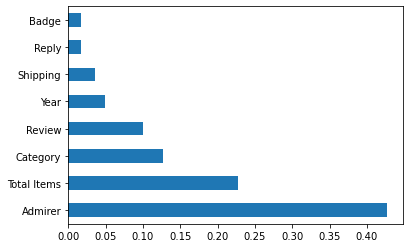

In [108]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [144]:
x = Scraped_data[['Admirer','Category','Review','Total Items','Year','Badge']]
#x = Scraped_data[['Category','Total Items']]

y = Scraped_data['Sales Dummy']
       
logit_model = sm.Logit(y,x)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.508592
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            Sales Dummy   No. Observations:                 5992
Model:                          Logit   Df Residuals:                     5986
Method:                           MLE   Df Model:                            5
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                  0.2663
Time:                        14:42:22   Log-Likelihood:                -3047.5
converged:                       True   LL-Null:                       -4153.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Admirer         0.0005   1.81e-05     24.921      0.000       0.000       0.000
Category       -0.0704    

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the model on the training set
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# Predict sales on the testing set
y_pred = logreg.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)


Accuracy: 78.6488740617181


/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# What if Analysis

In [146]:
coef = result.params
#print(pd.DataFrame(coef))
print("Exp(Coef) would be as follow:")
print(pd.DataFrame(np.exp(coef)))


Exp(Coef) would be as follow:
                    0
Admirer      1.000452
Category     0.932003
Review       1.107238
Total Items  1.002017
Year         0.999433
Badge        1.298777


# Logistic Regression (Badge)

----- SAMAN NOTE: This NaN is very strange! but accuracy is good! I do selection but the accuracy drop So I think we should ignore Badge as the target variable. 

In [112]:
x = Scraped_data[['Rating','Image','Announce','Admirer','Sales','Category','Shipping','Review','Total Items','Year','Reply']]
y = Scraped_data['Badge']

logit_model = sm.Logit(y,x)
result = logit_model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.071134
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                  Badge   No. Observations:                 5992
Model:                          Logit   Df Residuals:                     5981
Method:                           MLE   Df Model:                           10
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                  0.8956
Time:                        14:25:53   Log-Likelihood:                -426.24
converged:                       True   LL-Null:                       -4081.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Rating         -4.6711      0.377    -12.394      0.000      -5.410      -3.932
Image          -1.4754   

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the model on the training set
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# Predict sales on the testing set
y_pred = logreg.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)


Accuracy: 90.32527105921602


/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/var/folders/s5/4b25bvq14pqbm1qxsg0hhlr40000gn/T/ipykernel_39350/2887191176.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Scraped_data.corr()


<AxesSubplot:>

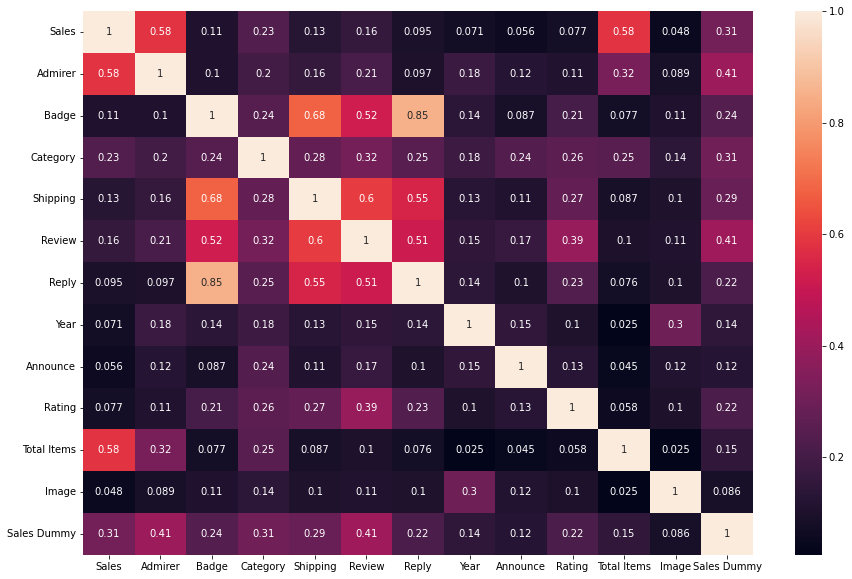

In [114]:
correlation_matrix = Scraped_data.corr()
#print(correlation_matrix)
      #['Shipping'].sort_values(ascending=False))

import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True)


Based on the correlation I see who are the most corrolated one so I drop it

In [115]:
#droped one: ,'Sales','Review','Shipping','Reply'
x = Scraped_data[['Rating','Image','Announce','Admirer','Category','Total Items','Year']]
y = Scraped_data['Badge']

logit_model = sm.Logit(y,x)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.662853
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  Badge   No. Observations:                 5992
Model:                          Logit   Df Residuals:                     5985
Method:                           MLE   Df Model:                            6
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                 0.02687
Time:                        14:26:26   Log-Likelihood:                -3971.8
converged:                       True   LL-Null:                       -4081.5
Covariance Type:            nonrobust   LLR p-value:                 1.422e-44
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Rating         -0.0401      0.020     -2.036      0.042      -0.079      -0.001
Image          -0.6258    

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the model on the training set
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# Predict sales on the testing set
y_pred = logreg.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)


Accuracy: 59.63302752293578


In [117]:
coef = result.params
#print(pd.DataFrame(coef))
print("Exp(Coef) would be as follow:")
print(pd.DataFrame(np.exp(coef)))


Exp(Coef) would be as follow:
                    0
Rating       0.960728
Image        0.534819
Announce     0.648718
Admirer      1.000014
Category     1.068920
Total Items  1.000083
Year         1.000153


So here again it doesn't make sense!

# Linear Regression (Number of Sales)

In [118]:
from sklearn.linear_model import LinearRegression

x = Scraped_data[['Rating','Image','Announce','Admirer','Badge','Category','Shipping','Review','Total Items','Year','Reply']]
y = Scraped_data['Sales']

# add a constant term to the input data
x = sm.add_constant(x)

# fit the OLS model
model = sm.OLS(y, x).fit()

# print the summary table
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     581.3
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:27:07   Log-Likelihood:                -68380.
No. Observations:                5992   AIC:                         1.368e+05
Df Residuals:                    5980   BIC:                         1.369e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         934.6736   1658.754      0.563      

----- SAMAN NOTE : Now the R sqaure is not good we can work on it by doing feature engineering like log and etc

I tried scaling here but again doesn't change the R square

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# create MinMaxScaler object
scaler = MinMaxScaler()

# scale the features between 0 and 1
x_scaled = scaler.fit_transform(Scraped_data[['Rating','Image','Announce','Admirer','Badge','Category','Shipping','Review','Total Items','Year','Reply']])

# create a DataFrame of the scaled features
x = pd.DataFrame(x_scaled, columns=['Rating','Image','Announce','Admirer','Badge','Category','Shipping','Review','Total Items','Year','Reply'])
y = pd.DataFrame(scaler.fit_transform(Scraped_data[['Sales']]))

# add a constant term to the input data
x = sm.add_constant(x)

# fit the OLS model
model = sm.OLS(y, x).fit()

# print the summary table
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     638.0
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:20:42   Log-Likelihood:                 14097.
No. Observations:                5992   AIC:                        -2.817e+04
Df Residuals:                    5981   BIC:                        -2.810e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0004      0.002     -0.269      

[False False False  True False  True False False  True False False  True]


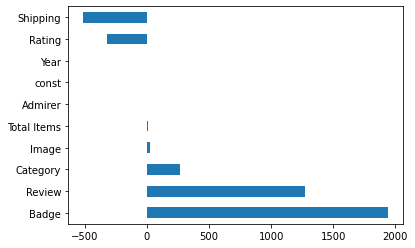

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

# Assume x and y are the input and output variables respectively
model = LinearRegression()
selector = SelectFromModel(model)
selector.fit(x, y)

# Print the selected features
print(selector.get_support())

# Plot graph of feature importances for better visualization
feat_importances = pd.Series(selector.estimator_.coef_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

/var/folders/s5/4b25bvq14pqbm1qxsg0hhlr40000gn/T/ipykernel_39350/3408025286.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Scraped_data.corr()


<AxesSubplot:>

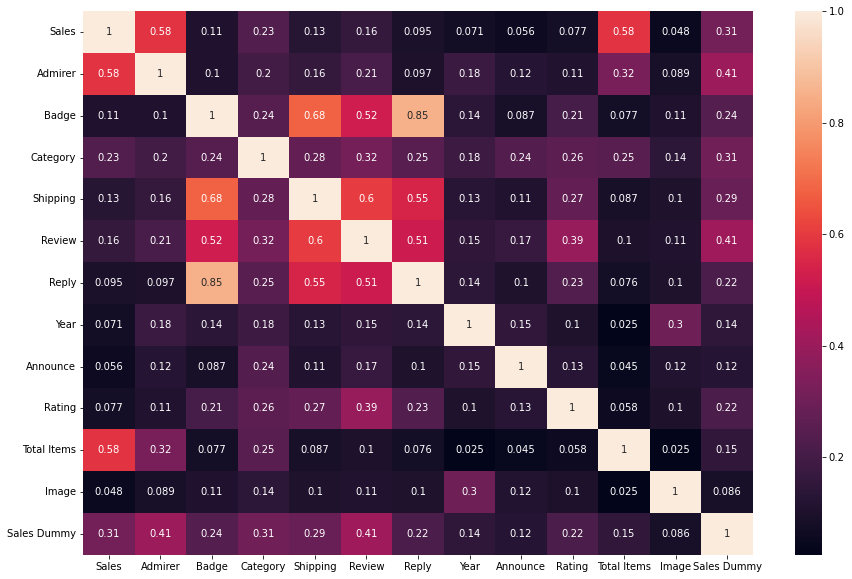

In [122]:
correlation_matrix = Scraped_data.corr()
#print(correlation_matrix)
      #['Shipping'].sort_values(ascending=False))

import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True)

In [148]:
from sklearn.linear_model import LinearRegression

x = Scraped_data[['Admirer','Review','Total Items','Year','Badge']]
#'Category',
y = Scraped_data['Sales']

# add a constant term to the input data
x = sm.add_constant(x)

# fit the OLS model
model = sm.OLS(y, x).fit()

# print the summary table
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     1269.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:04:34   Log-Likelihood:                -68393.
No. Observations:                5992   AIC:                         1.368e+05
Df Residuals:                    5986   BIC:                         1.368e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -838.0106    683.980     -1.225      